# Mall Customer Data Analysis
This notebook performs exploratory data analysis on the Mall Customers dataset. If the dataset is not available, a dummy dataset will be generated for demonstration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure directory exists
os.makedirs('models', exist_ok=True)

# Load dataset or create dummy data
data_path = 'data/Mall_Customers.csv'
try:
    df = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"File not found at {data_path}. Creating dummy dataset...")
    dummy_data = {
        'CustomerID': range(1, 11),
        'Gender': ['Male', 'Female'] * 5,
        'Age': list(range(20, 70, 5)),
        'Annual Income (k$)': list(range(15, 65, 5)),
        'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 72, 10, 65]
    }
    df = pd.DataFrame(dummy_data)
    os.makedirs('data', exist_ok=True)
    df.to_csv(data_path, index=False)
    print("Dummy dataset saved.")

# Rename columns for easier reference
df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
}, inplace=True)

df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Display basic statistics
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
# Check for missing values
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

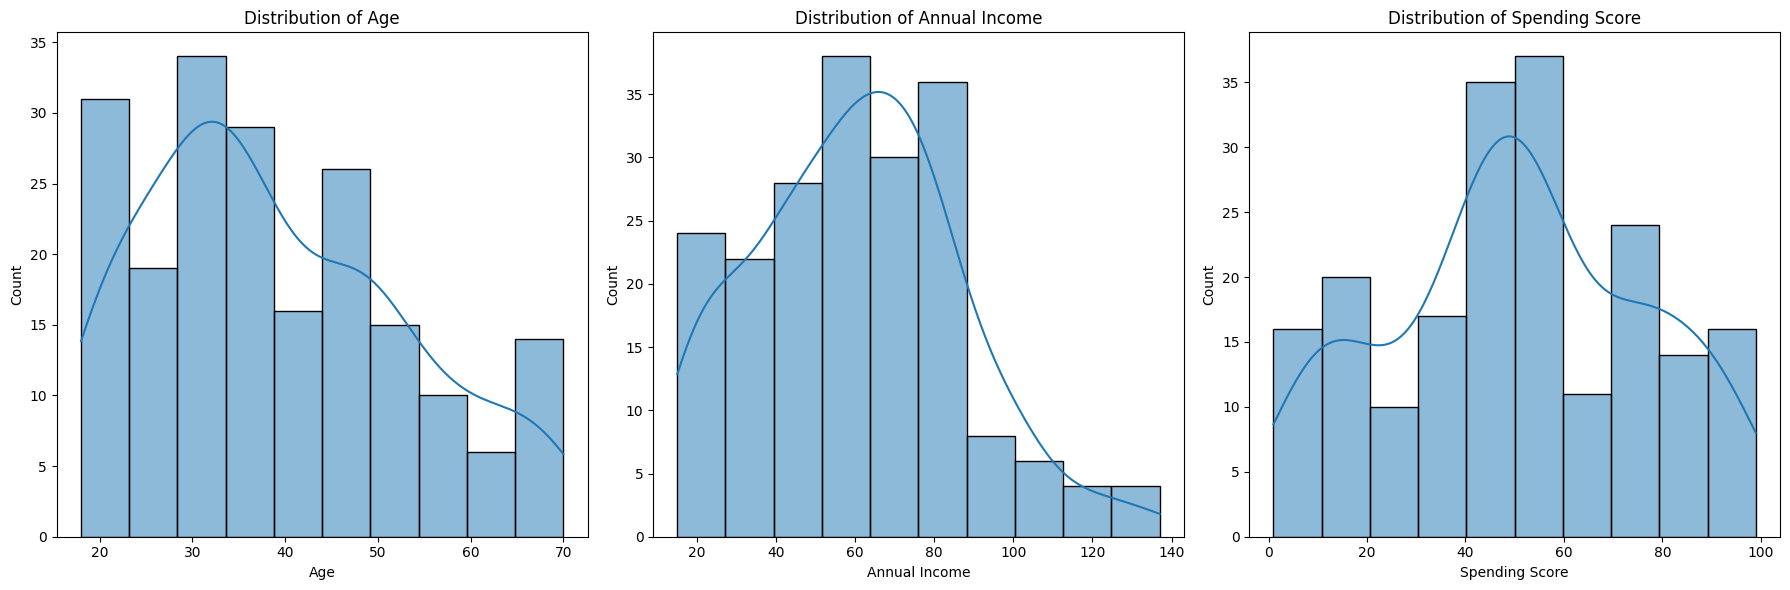

In [5]:
# Plot distributions
plt.figure(figsize=(18, 6))

for i, feature in enumerate(['Age', 'Annual Income', 'Spending Score'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=10)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.savefig('models/distributions.png')
plt.show()

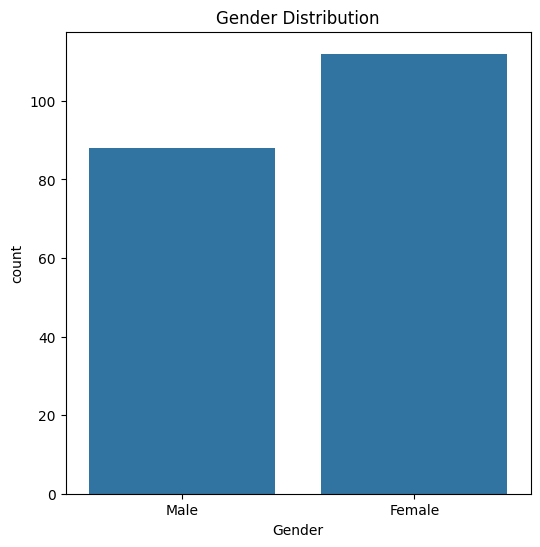

In [6]:
# Gender distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.savefig('models/gender_distribution.png')
plt.show()

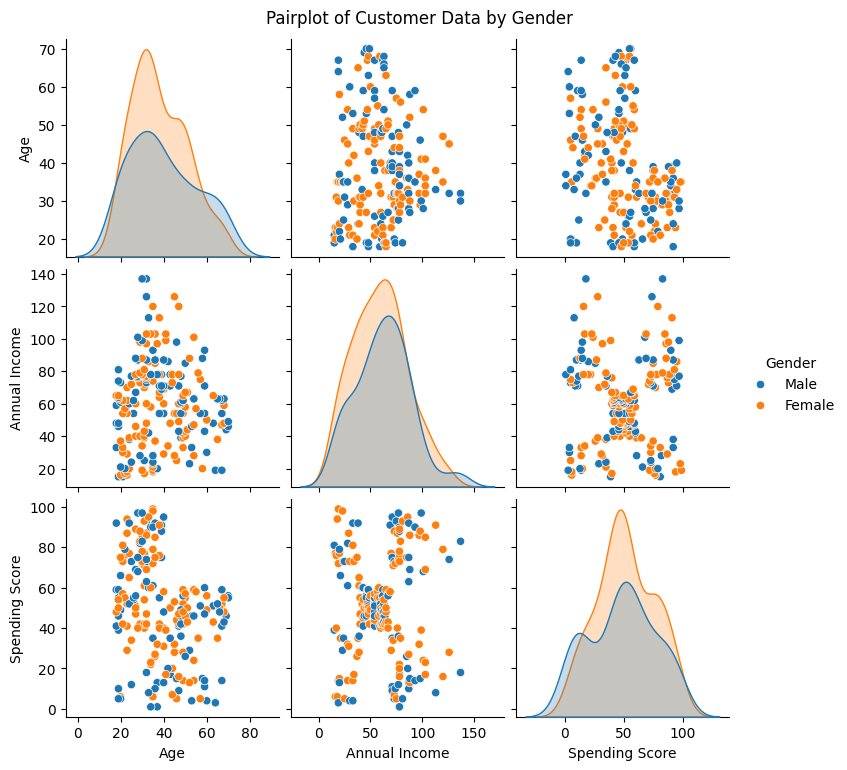

In [7]:
# Pairplot with gender hue
sns.pairplot(df, vars=['Age', 'Annual Income', 'Spending Score'], hue='Gender')
plt.suptitle('Pairplot of Customer Data by Gender', y=1.02)
plt.savefig('models/pairplot.png')
plt.show()

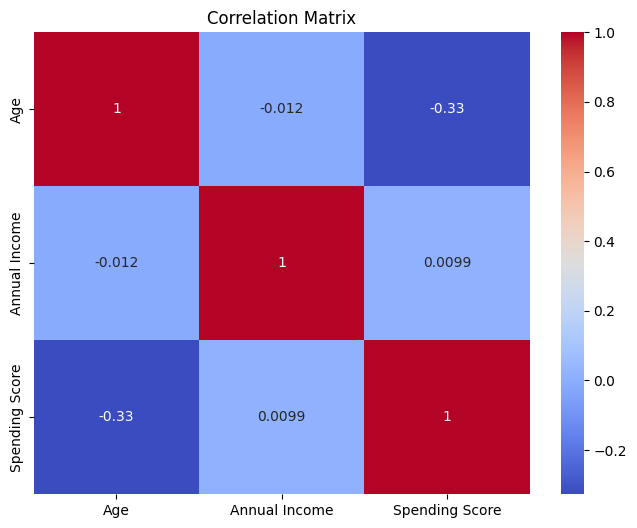

In [8]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Annual Income', 'Spending Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('models/correlation_matrix.png')
plt.show()